<a href="https://colab.research.google.com/github/megumihoshino/Machine-Learning-Terapan-/blob/main/predictive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#data loading
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

#load the dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [2]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [3]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


*   std: standar deviasi
*   25%: Q1
*   50%: Q2
*   75%: Q3







In [4]:
#missing value

x = (diamonds.x == 0).sum()
y = (diamonds.y == 0).sum()
z = (diamonds.z == 0).sum()

print("nilai 0 di kolom x ada: ", x)
print("nilai 0 di kolom y ada: ", y)
print("nilai 0 di kolom z ada: ", z)


nilai 0 di kolom x ada:  8
nilai 0 di kolom y ada:  7
nilai 0 di kolom z ada:  20


In [5]:
diamonds.loc[(diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


nilai 0 pada dimensi x dan y juga memiliki nilai 0 pd dimensi z. ada bbrp teknik utk mengatasi missing value, antara lain menghapus atau melakukan drop thd data yg hilang, mengganti dgn mean ato median, serta memprediksi dan mengganti dgn teknik regresi.

karena jml missing value pd dataset ini msh kecil (20 sampel), maka tidak jd mslh krn kita msh punya 53.920 sampel lainnya. cuma, klo banyak baru jadi masalah dan perlu cara lain.

In [6]:
#drop baris dengan nilai 'x', 'y', 'z' = 0
diamonds = diamonds.loc[(diamonds[['x', 'y', 'z']]!=0).all(axis=1)]

#cek ukuran data utk memastikan baris sdh di-drop
diamonds.shape


(53920, 10)

In [7]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='carat'>

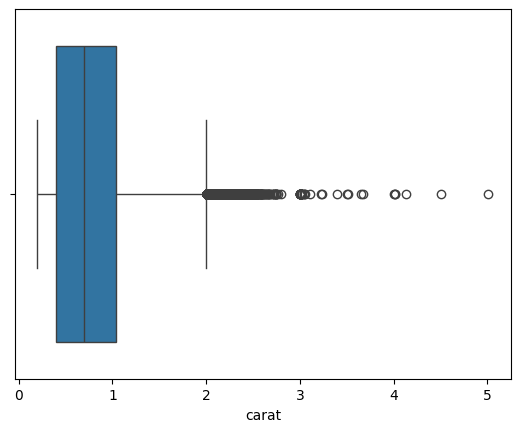

In [8]:
#1. carat (boxplot)
sns.boxplot(x=diamonds['carat'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='table'>

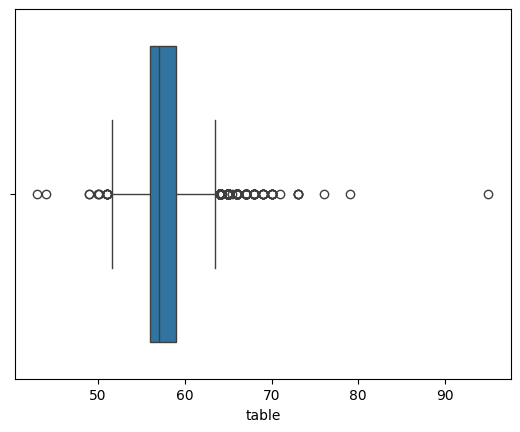

In [9]:
#2. table
sns.boxplot(x=diamonds['table'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='x'>

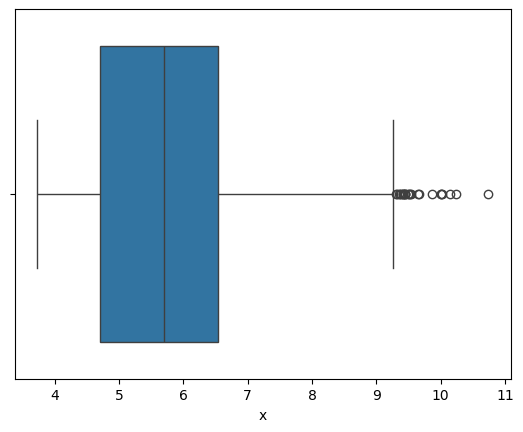

In [10]:
sns.boxplot(x=diamonds['x'])

outliers yang diidentifikasi oleh boxplot atau disebut juga "boxplot outliers" didefinisikan sbg data yg nilainya 1.5 QR di atas Q3 atau 1.5 QR di bwh Q1.

In [11]:
# Select only numerical columns before calculating quantiles
numerical_diamonds = diamonds.select_dtypes(include=['number'])

# Calculate Q1, Q3, and IQR for numerical columns only
Q1 = numerical_diamonds.quantile(0.25)
Q3 = numerical_diamonds.quantile(0.75)
IQR = Q3 - Q1

# Filter outliers based on numerical columns
diamonds = diamonds[~((numerical_diamonds < (Q1 - 1.5 * IQR)) | (numerical_diamonds > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the shape of the dataset after removing outliers
diamonds.shape

(47524, 10)

data bersih yg ada skrg 47524 sampel

**data preparation**

pada bagian ini, akan dilakukan 4 tahap persiapan data:
- encoding fitur kategori (one-hot encoding)
- reduksi dimensi dgn PCA (principal component analysis)
- pembagian dataset dengan fungsi train_test_split dari library sklearn
- standarisasi



In [12]:
from sklearn.preprocessing import  OneHotEncoder
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity')],axis=1)
diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)
diamonds.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
5,0.24,62.8,57.0,336,3.94,3.96,2.48,False,False,False,...,False,True,False,False,False,False,False,False,False,True


**reduksi dengan dimensi PCA**

teknik reduksi (pengurangan) dimensi adalah prosedur yg mengurangi jml fitur dgn ttp mempertahankan informasi pd data.

principal component analysis atau disingkat menjadi PCA. ia adalah teknik utk mereduksi dimensi, mengekstraksi fitur, dan mentransformasi data dari transformasi "n-dimensional space" ke dlm sistem berkoordinat baru dgn dimensi m, dimn m lbh kecil dari n.

PCA bekerja dgn metode aljabar linier. PCA itu berdasarkan asumsi sekumpulan data pada arah dgn varians terbesar nerup. yang paling penting (utama).

disclaimer:
pernyataan di atas agak aneh, krn emg sbnrnya bhs matematis yg "berusaha" ditranslate ke bhs biasa. utk mau tahu persamaannya gimana, tanya CHTAGPT ajh yh..

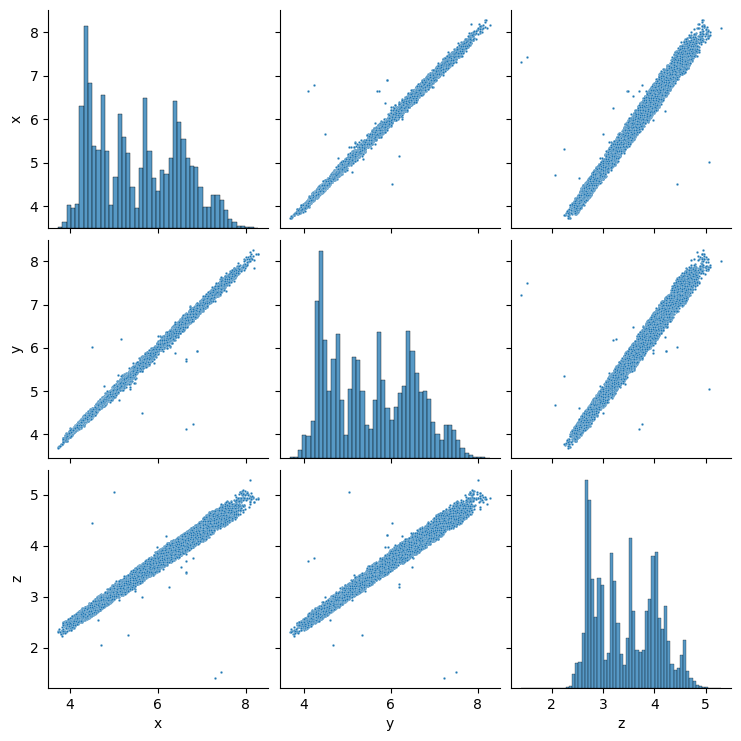

In [13]:
sns.pairplot(diamonds[['x', 'y', 'z']], plot_kws ={"s":3})

In [14]:
#aplikasikan class PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(diamonds[['x','y','z']])
princ_comp=pca.transform(diamonds[['x', 'y', 'z']])

penjelasan:

1. parameter yg dimasukkan n_components dan random_state.
  - n_components: jml komponen atau dimensi. dlm kasus kita jmlhnya ada 3 yaitu x, y, dan z.
  - random_state: mengontrol random number generator yg digunakan. pd kasus ini kita menerapkan random_state = 123


In [15]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

beli ciki beli koyo~

ini penjelasannya:
- 99.8% informasi pada ketiga fitur x, y, dan z pada PC pertama
- 0.2% dan 0.1% terdpt pada PC kedua dan ketiga.
- ketiganya kalau dijumlahin pasti 100%
- akan dilakukan reduksi dimensi dan hny mempertahankan PC pertama. PC pertama ini akn menjadi fitur dimensi atau ukuran berlian menggantukan ketiga fitur lainnya.

- kita beri nama fitur ini sbg "dimension"

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1, random_state = 123)
pca.fit(diamonds[['x','y','z']])
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('x','y','z')]).flatten()
diamonds.drop(['x','y','z'], axis=1, inplace = True)
diamonds.head()

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0.23,61.5,55.0,326,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,-2.452585
1,0.21,59.8,61.0,326,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,-2.630066
3,0.29,62.4,58.0,334,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,-2.048530
4,0.31,63.3,58.0,335,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,-1.831975
5,0.24,62.8,57.0,336,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,-2.451982


di atas telah ada fitur baru bernama 'dimension' utk menggantikan fitur x, y, dan z.

code breakdown:
- n_component = 1, krn jmlh komponen hny ada satu
- fit model dgn masukan
- tmbh fitur baru ke dataset dgn nama 'dimension' dan melakukan proses transformasi.
- drop kolom x, y, dan z

**TRAIN TEST SPLIT**

In [17]:
from sklearn.model_selection import train_test_split

X= diamonds.drop(["price"], axis=1)
y=diamonds["price"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=123)

In [18]:
print(f'total data: {len(X)}')
print(f'training data: {len(X_train)}')
print(f'testing data: {len(X_test)}')

total data: 47524
training data: 42771
testing data: 4753


**STANDARISASI**

In [19]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
536,-0.026226,0.864091,0.143464
21293,1.348407,1.359644,1.353588
45577,-0.511390,-0.622566,-0.372761
37379,-0.834833,-0.622566,-0.905790
38240,-0.861787,-0.622566,-0.813165


In [20]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,42771.0000,42771.0000,42771.0000
mean,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000
min,-1.3739,-2.6048,-1.8867
25%,-0.8887,-0.6226,-0.9283
50%,-0.2688,-0.1270,-0.1063
75%,0.8093,0.8641,0.8847
max,3.4777,3.0941,2.6998


StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

**ALGORITHM**

In [21]:
import pandas as pd
models = pd.DataFrame(index = ['train_mse', 'test_mse'],
                      columns = ['KNN', 'Random Forest', 'Boosting'])

**KNN ALGORITHM**

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X_train, y_train)

models.loc['train_mse', 'knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true = y_train)

**RANDOM FOREST**

In [25]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators = 100, random_state = 55, n_jobs = -1)

RF.fit(X_train, y_train)

models.loc['train_mse', 'RF'] = mean_squared_error(y_pred = RF.predict(X_train), y_true = y_train)

**BOOSTING**

In [26]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate = 0.05, random_state = 55)
boosting.fit(X_train, y_train)
models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred = boosting.predict(X_train), y_true = y_train)

**EVALUASI MODEL**

In [27]:
#scaling thd fitur numerik pd X_test shg memiliki rata2 = 0 dan varians = 1

X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [29]:
#evaluasi ketiga model algorithm

#buat variabel mse yg terdiri dari dataframe nilai mse data train dan test pd masing2 algorithm

mse = pd.DataFrame(columns =['train', 'test'], index = ['KNN', 'RF', 'Boosting'])

model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

#hitung mse tiap masiing2 algorithm

for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true = y_train, y_pred = model.predict(X_train))/1e3
  mse.loc[name, 'test'] = mean_squared_error(y_true = y_test, y_pred = model.predict(X_test))/1e3

#panggil mse

mse


,train,test
KNN,270.694283,304.97089
RF,18.225762,127.717715
Boosting,904.838013,846.212966


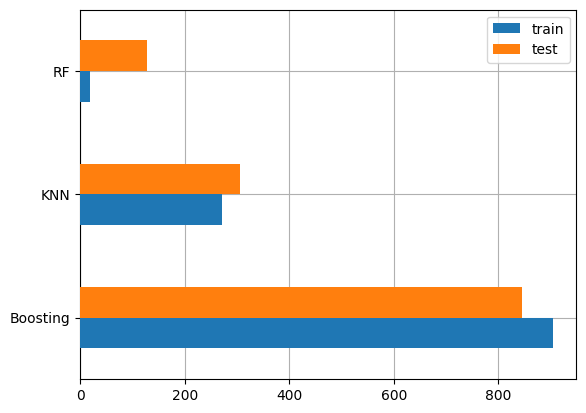

In [30]:
fig, ax = plt.subplots()
mse.sort_values(by = 'test', ascending = False).plot(kind = 'barh', ax = ax, zorder = 3)
ax.grid(zorder = 0)

algoritma RF memiliki nilai error paling kecil, sedangkan boosting memiliki nilai error paling besar. jadi, utk diamonds, selanjutnya akan digunakan model algorithm RF.

In [31]:
#prediksi

prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true': y_test[:1]}
for name, model in model_dict.items():
  pred_dict['prediksi_' +name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
35096,886,917.7,885.9,788.1


nilai hasil algorithm RF mendekati y_true